In [2]:
import mdtraj as md
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd

This notebook compares the two active sites in the crystal structure and the trajectories with in terms of the reaction coordinates and hydrogren bonds.  

In [7]:
# Topologies in Amber trajectories
as_d = md.load('outputs/trajectories/as_d_top.pdb')
as_h = md.load('outputs/trajectories/as_h_top.pdb')
as_d_df, _ = as_d.top.to_dataframe()
as_h_df, _ = as_h.top.to_dataframe()

# Crystal structure
xtal = md.load('data/MD/2agy_c36_state0.pdb')
xtal = xtal.atom_slice(xtal.top.select('not water'))
xtal_df, _ = xtal.top.to_dataframe()

# Select the active sites in crystal structure
as_res_num = [82, 109, 84, 172, 128, 160]
x_as_d_ix = list(xtal_df.loc[xtal_df.resSeq.isin(as_res_num) & (xtal_df.segmentID=='D'), :].index)
x_as_h_ix = list(xtal_df.loc[xtal_df.resSeq.isin(as_res_num) & (xtal_df.segmentID=='H'), :].index)
x_as_d = xtal.atom_slice(x_as_d_ix)
x_as_h = xtal.atom_slice(x_as_h_ix)

x_as_d_df, _ = x_as_d.top.to_dataframe()
x_as_h_df, _ = x_as_h.top.to_dataframe()

x_as_d.save('outputs/2agy_as_d.pdb')
x_as_h.save('outputs/2agy_as_h.pdb')

In [35]:
as_d_df.loc[as_d_df.resName=='ASP', :]

,serial,name,element,resSeq,resName,chainID,segmentID
10,11,N,N,374,ASP,0,
11,12,H,H,374,ASP,0,
12,13,CA,C,374,ASP,0,
13,14,HA,H,374,ASP,0,
14,15,CB,C,374,ASP,0,
15,16,HB3,H,374,ASP,0,
16,17,HB2,H,374,ASP,0,
17,18,CG,C,374,ASP,0,
18,19,OD1,O,374,ASP,0,
19,20,OD2,O,374,ASP,0,


The differenc between the two numbering schemes. 

In [5]:
d_ix = as_d_df.loc[d_top_df.resName=='TTW', 'resSeq'].unique()[0]
h_ix = as_h_df.loc[h_top_df.resName=='TTW', 'resSeq'].unique()[0]
x_ix = xtal_df.loc[xtal_df.resName=='TTW', 'resSeq'].unique()[0]

Define relevant atoms. 
From table 3 of https://pubs.acs.org/doi/pdf/10.1021/acs.jpcb.7b06892

In [38]:
def get_coords(top, offset):
    c1 = top.top.select("resn TTW and name CI2")[0]
    h1_2 = top.top.select("resn TTW and name HI2")[0]
    h1_3 = top.top.select("resn TTW and name HI3")[0]
    o1 = top.top.select("residue {} and name OD1".format(128+offset))[0]
    o2 = top.top.select("residue {} and name OD2".format(128+offset))[0]
    o7 = top.top.select("resn TTW and name OT")[0]
    he1 = top.top.select("resn TTW and name HE1")[0]
    hnt = top.top.select("resn TTW and name HNT")[0]

    a82o = top.top.select("residue {} and name O".format(82+offset))[0]
    d84o = top.top.select("residue {} and name O".format(84+offset))[0]
    d84h = top.top.select("residue {} and name H".format(84+offset))[0]

    hg1 = top.top.select("residue {} and name HG1".format(172+offset))[0]
    w160hn = top.top.select("residue {} and name H".format(160+offset))[0]
    return {'C1': c1, 'H1_2': h1_2, 'H1_3': h1_3, 'O1': o1, 
           'O2': o2, 'O7': o7, 'HE1': he1, 'HNT': hnt, 'A82_O': a82o,
           'D84_O': d84o,'D84_H': d84h, 'T172_HG1': hg1, 'W160_H': w160hn}

d_ixs = get_coords(as_d, d_ix - x_ix)
h_ixs = get_coords(as_h, h_ix - x_ix)

In [40]:
as_d_df.loc[d_ixs.values(), :]

,serial,name,element,resSeq,resName,chainID,segmentID
44,45,CI2,C,399,TTW,0,
45,46,HI2,H,399,TTW,0,
46,47,HI3,H,399,TTW,0,
75,76,OD1,O,418,ASP,0,
76,77,OD2,O,418,ASP,0,
40,41,OT,O,399,TTW,0,
33,34,HE1,H,399,TTW,0,
43,44,HNT,H,399,TTW,0,
9,10,O,O,372,ALA,0,
21,22,O,O,374,ASP,0,


In [41]:
as_h_df.loc[h_ixs.values(), :]

,serial,name,element,resSeq,resName,chainID,segmentID
44,45,CI2,C,872,TTW,0,
45,46,HI2,H,872,TTW,0,
46,47,HI3,H,872,TTW,0,
75,76,OD1,O,891,ASP,0,
76,77,OD2,O,891,ASP,0,
40,41,OT,O,872,TTW,0,
33,34,HE1,H,872,TTW,0,
43,44,HNT,H,872,TTW,0,
9,10,O,O,845,ALA,0,
21,22,O,O,847,ASP,0,


put this into a bond table. 

In [63]:
labels = [
        ('C1', 'H1_2'), ('C1', 'H1_3'),
        ('O1', 'C1'), ('O2', 'C1'),
        ('O1', 'H1_2'), ('O2', 'H1_2'), ('O1', 'H1_3'), ('O2', 'H1_3'), 
        ('HE1', 'O7'), 
        ('HE1', 'A82_O'), 
        ('HNT', 'O7'), 
        ('HNT', 'D84_O'), 
        ('O7', 'D84_H'), 
        ('O2', 'T172_HG1'), 
        ('O1', 'W160_H')
    ]
def get_bonds(a_dict):
    bonds_ix = []
    for bond in labels: 
        bonds_ix.append([a_dict[bond[0]], a_dict[bond[1]]])
    return bonds_ix

d_bonds = get_bonds(d_ixs)
h_bonds = get_bonds(h_ixs)

## Bond distances

Calculate the bond distances with a stride of 10

In [76]:
n_trajs = 100
stride = 10
root_dir = 'outputs/trajectories/'
dist_d = [md.compute_distances(md.load(root_dir+'as_d_{}.xtc'.format(i+1), top=as_d, stride=stride),
                               d_bonds) for i in range(n_trajs)]
dist_h = [md.compute_distances(md.load(root_dir+'as_h_{}.xtc'.format(i+1), top=as_h, stride=stride),
                               h_bonds) for i in range(n_trajs)]

collate and save

In [90]:
print([x.shape[0] for x in dist_d])

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 3, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


In [149]:
to_ns = 0.001
to_ang = 10

traj = md.load(root_dir+'as_d_1.xtc', top=as_d_top, stride=stride)
ts = traj.timestep*to_ns

t_array = [np.arange(x.shape[0]) for x in dist_d]
d_array = [np.repeat('D', x.shape[0]) for x in dist_d]
h_array = [np.repeat('H', x.shape[0]) for x in dist_d]
idx_array = [np.repeat(i+1, x.shape[0]) for i, x in enumerate(dist_d)]

bond_labels = [x[0]+'-'+x[1] for x in labels]

dist_d_df = pd.DataFrame(np.concatenate(dist_d)*to_ang, columns=bond_labels)
dist_d_df = dist_d_df.join(pd.DataFrame({'t (ns)': np.concatenate(t_array)*ts,  
                                'Site': np.concatenate(d_array),
                               'Trajectory': np.concatenate(idx_array)}))

dist_h_df = pd.DataFrame(np.concatenate(dist_h)*to_ang, columns=bond_labels)
dist_h_df = dist_h_df.join(pd.DataFrame({'t (ns)': np.concatenate(t_array)*ts,  
                                'Site': np.concatenate(h_array),
                               'Trajectory': np.concatenate(idx_array)}))

dists = pd.concat([dist_d_df, dist_h_df])
dists = dists.drop(columns=['C1-H1_2', 'C1-H1_3'])

dists.to_csv('outputs/bond_distances.csv', index=False)

Plot distributions

In [190]:
d_lab = r'Distance ($\AA$)'
dists_l = dists.melt(id_vars=['t (ns)', 'Site', 'Trajectory'], 
                     var_name='Bond', value_name=d_lab)


sample = dists_l.loc[dists_l['t (ns)'].isin(np.arange(0, 100, 1)), :].copy(deep=True)

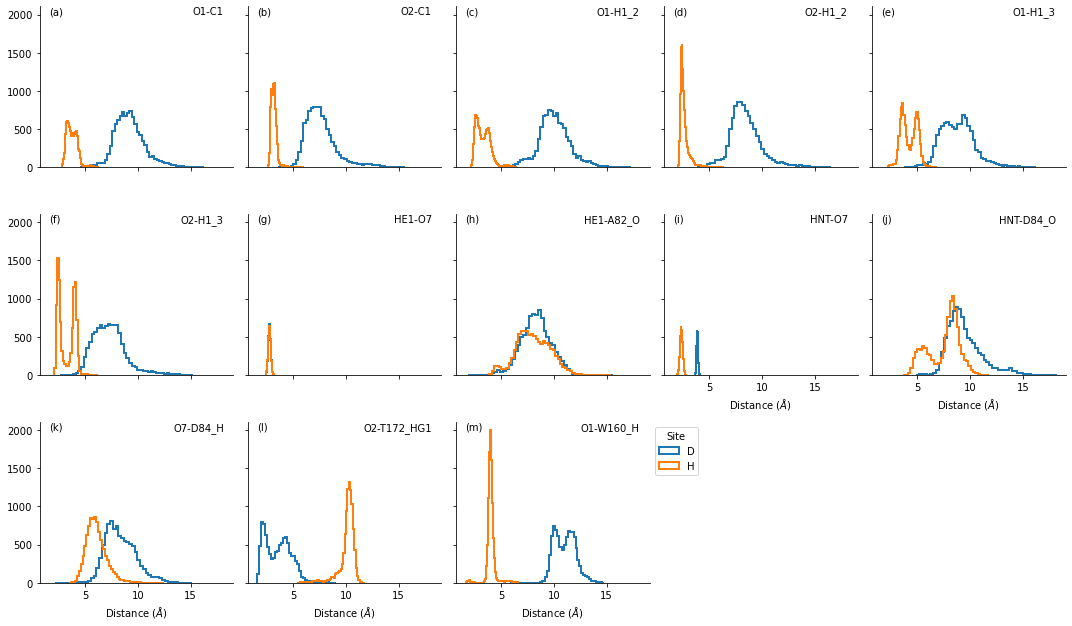

In [159]:
with sns.plotting_context(font_scale=1.25):
    g = sns.FacetGrid(data=sample, hue='Site', col='Bond', col_wrap=5)
    g.map(sns.distplot, d_lab, kde=False, 
          hist_kws={"histtype": "step", "linewidth": 2,"alpha": 1})
    g.set_titles("")
    labs = g.col_names
    lets = list('abcdefghijklmnop')
    for i, ax in enumerate(g.axes.flatten()):
        ax.annotate('({0})'.format(lets[i]), xy=(0.05, 0.95), 
                    xycoords='axes fraction')
        ax.annotate('{0}'.format(labs[i]), xy=(0.95, 0.95), 
                    xycoords='axes fraction', horizontalalignment='right')
    g.axes.flatten()[-1].legend(bbox_to_anchor=(1,1), title='Site', loc='upper left')
    plt.savefig('outputs/bond_distances_dist.png', dpi=450, bbox_inches='tight')